# Loan Approval Analysis

## 🔧 Import Libraries:-

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
sns.set(rc={"figure.figsize":(10,8)})

## 📂Load the Dataset.

In [38]:
df=pd.read_csv("loan_sanction_test.csv")

In [69]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


### 🔎Top 10 Rows

In [40]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [42]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## 🛠️ Handling missing values

In [73]:
def replace_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers with boundaries
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound,np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col]))
    return df_capped

In [76]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Replace outliers (capped version)
df = replace_outliers_iqr(df, numeric_cols)


In [78]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250.0,1993.0,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


## 📊  Summarize basic statistics for the numeric columns.

In [81]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.0,338.0
mean,4238.964578,1425.501362,132.171961,360.0,1.0
std,1950.976357,1600.086250,47.521079,0.0,0.0
min,0.000000,0.000000,28.000000,360.0,1.0
25%,2864.000000,0.000000,100.250000,360.0,1.0
50%,3786.000000,1025.000000,125.000000,360.0,1.0
75%,5060.000000,2430.500000,158.000000,360.0,1.0
max,8354.000000,6076.250000,244.625000,360.0,1.0


##  📈  Univariate Analysis

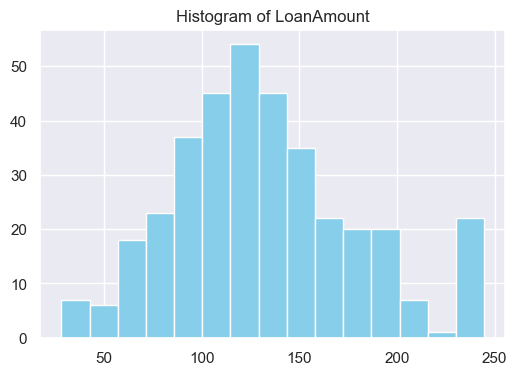

In [82]:
## Numeric Columns - Histograms

plt.figure(figsize=(6,4))
df['LoanAmount'].hist(bins=15, color='skyblue')
plt.title('Histogram of LoanAmount')
plt.show()

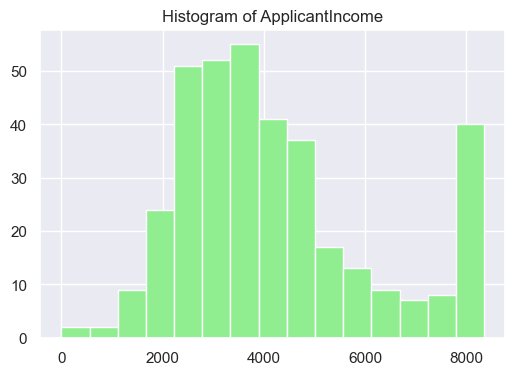

In [83]:
plt.figure(figsize=(6,4))
df['ApplicantIncome'].hist(bins=15, color='lightgreen')
plt.title('Histogram of ApplicantIncome')
plt.show()

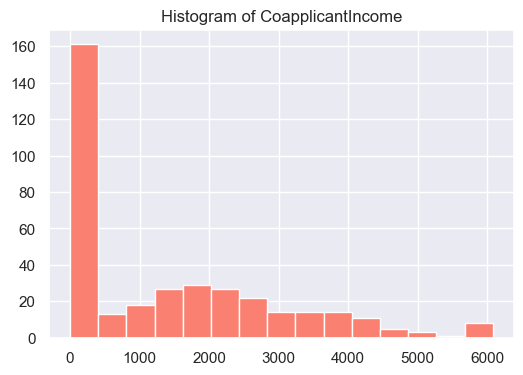

In [85]:
plt.figure(figsize=(6,4))
df['CoapplicantIncome'].hist(bins=15, color='salmon')
plt.title('Histogram of CoapplicantIncome')
plt.show()

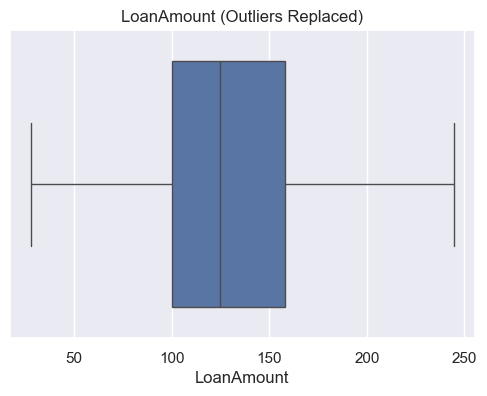

In [88]:
## LoanAmount Boxplot

plt.figure(figsize=(6,4))
sns.boxplot(x=df['LoanAmount'])
plt.title('LoanAmount (Outliers Replaced)')
plt.show()

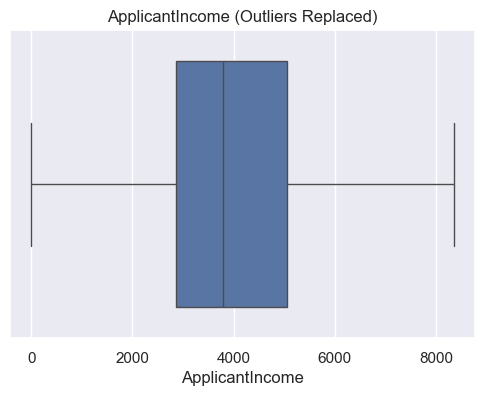

In [90]:
## ApplicantIncome Boxplot

plt.figure(figsize=(6,4))
sns.boxplot(x=df['ApplicantIncome'])
plt.title('ApplicantIncome (Outliers Replaced)')
plt.show()

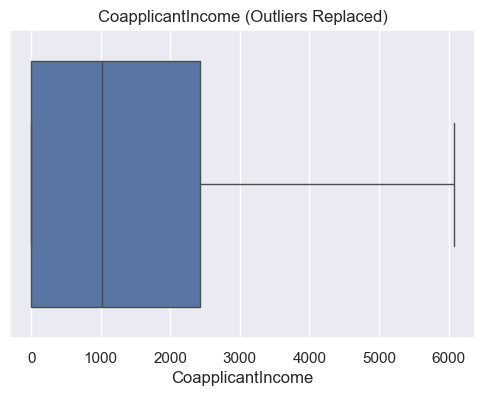

In [91]:
## CoapplicantIncome Boxplot

plt.figure(figsize=(6,4))
sns.boxplot(x=df['CoapplicantIncome'])
plt.title('CoapplicantIncome (Outliers Replaced)')
plt.show()

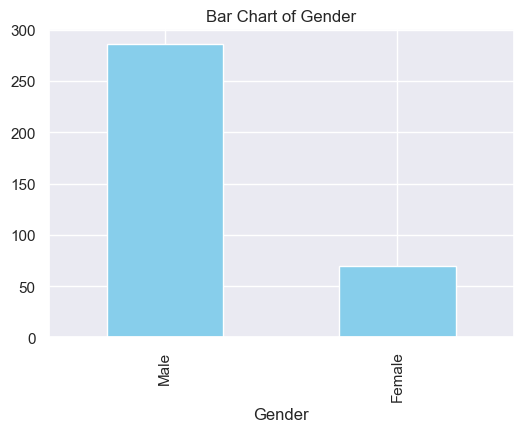

In [92]:
## Categorical Columns - Bar and Pie Charts

# Gender
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Gender')
plt.show()


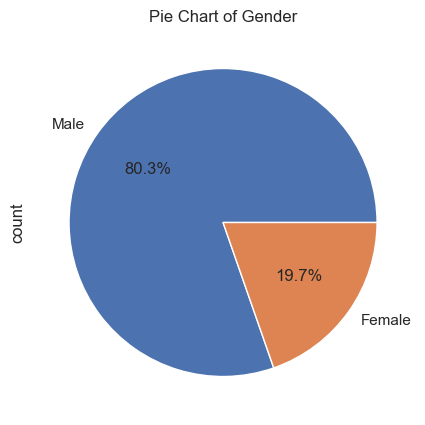

In [93]:
plt.figure(figsize=(5,5))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
plt.show()

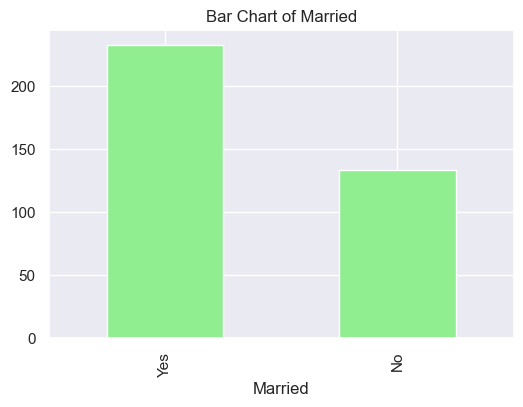

In [94]:
# Married

plt.figure(figsize=(6,4))
df['Married'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Bar Chart of Married')
plt.show()


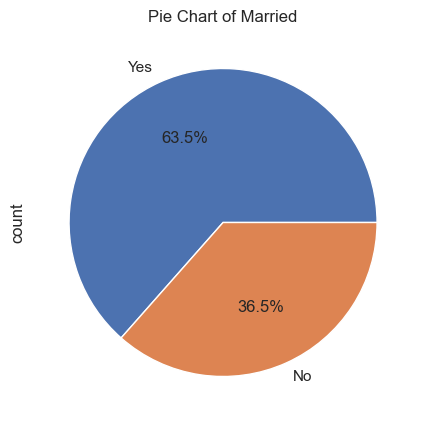

In [95]:
plt.figure(figsize=(5,5))
df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Married')
plt.show()

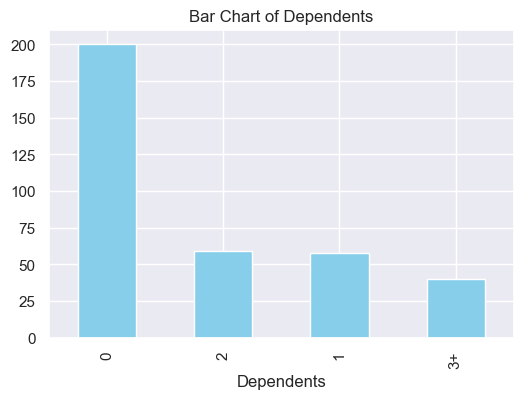

In [96]:
# Dependents

plt.figure(figsize=(6,4))
df['Dependents'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Dependents')
plt.show()

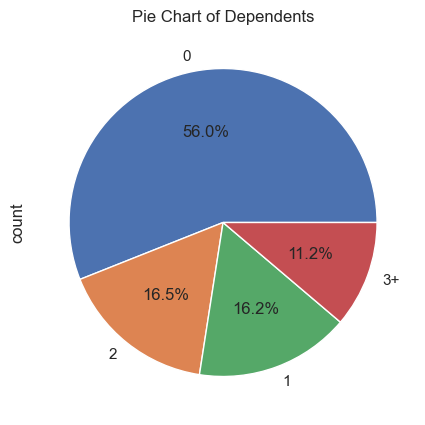

In [97]:
plt.figure(figsize=(5,5))
df['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Dependents')
plt.show()

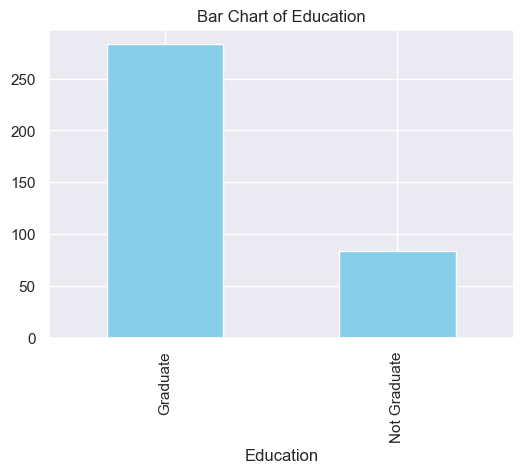

In [98]:
# Education

plt.figure(figsize=(6,4))
df['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Education')
plt.show()

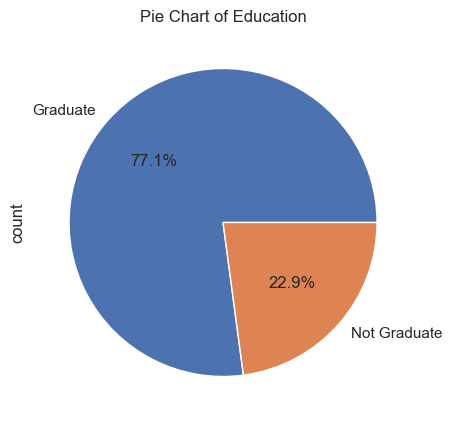

In [99]:
plt.figure(figsize=(5,5))
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Education')
plt.show()

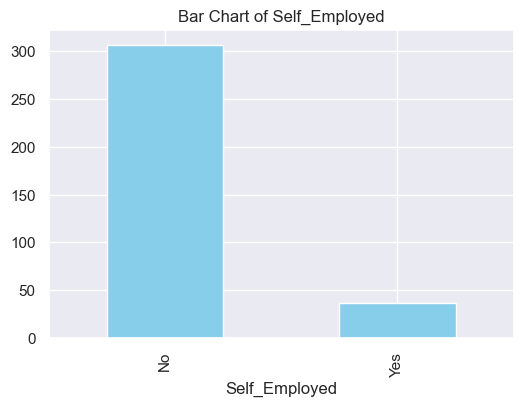

In [101]:
#Self_Employed

plt.figure(figsize=(6,4))
df['Self_Employed'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Self_Employed')
plt.show()

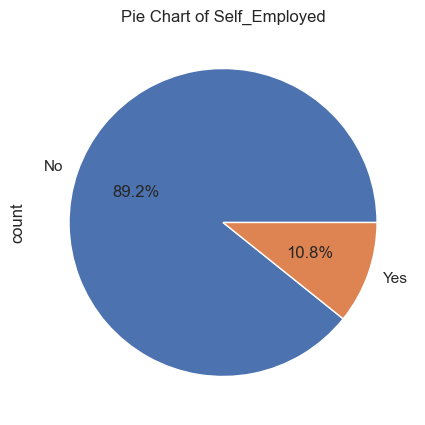

In [102]:
plt.figure(figsize=(5,5))
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Self_Employed')
plt.show()

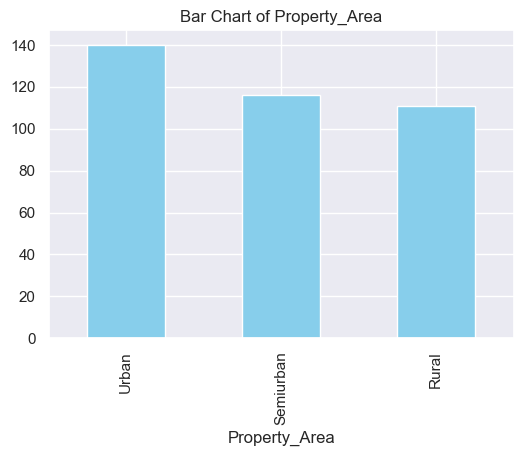

In [103]:
#Property_Area

plt.figure(figsize=(6,4))
df['Property_Area'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Property_Area')
plt.show()

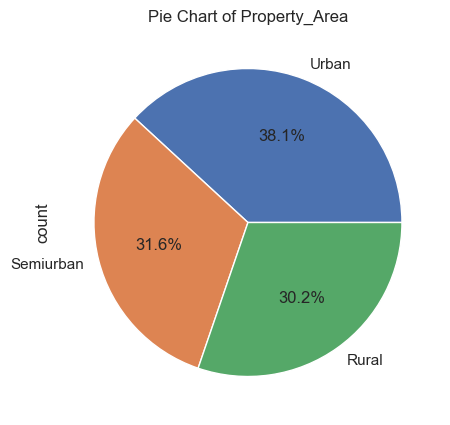

In [104]:
plt.figure(figsize=(5,5))
df['Property_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Property_Area')
plt.show()

##  📈 🔄 Bivariate Analysis

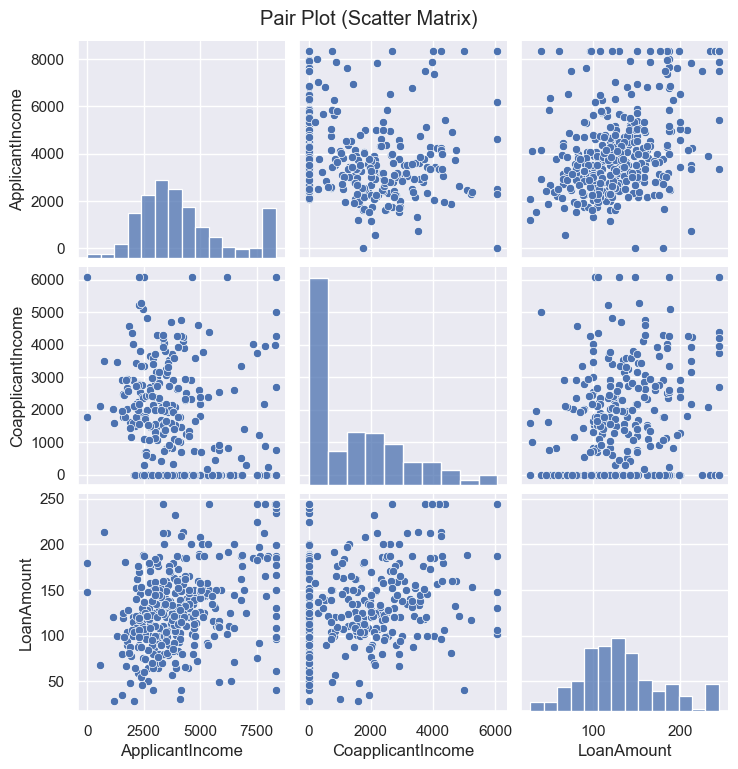

In [111]:
# Pair Plot (Scatter Matrix)

sns.pairplot(df,vars=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
plt.suptitle('Pair Plot (Scatter Matrix)', y=1.02)
plt.show()

###  Relationship between categorical and numeric variables using 📦 box plots or 🎻 violin plots

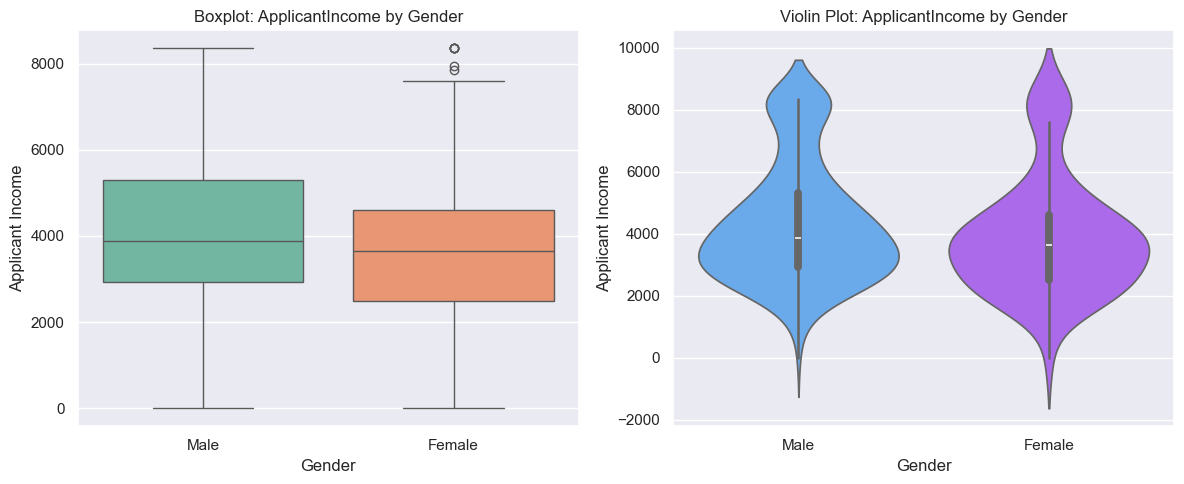

In [114]:
# ApplicantIncome with Gender

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Gender'], y=df['ApplicantIncome'], palette='Set2')
plt.title('Boxplot: ApplicantIncome by Gender')
plt.xlabel('Gender')
plt.ylabel('Applicant Income')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Gender'], y=df['ApplicantIncome'], palette='cool')
plt.title('Violin Plot: ApplicantIncome by Gender')
plt.xlabel('Gender')
plt.ylabel('Applicant Income')

plt.tight_layout()
plt.show()

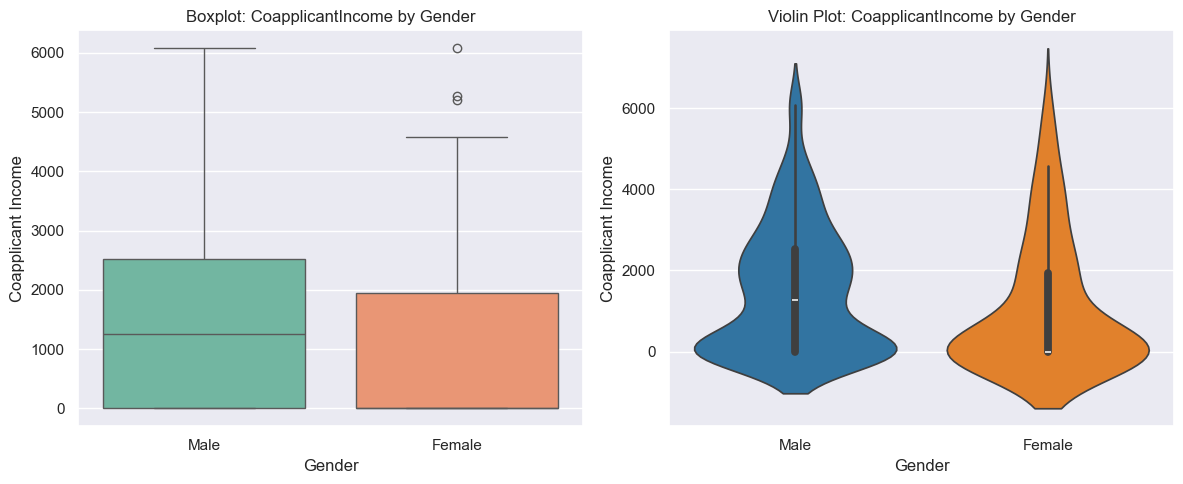

In [131]:
# CoapplicantIncome by Gender

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Gender'], y=df['CoapplicantIncome'], palette='Set2')
plt.title('Boxplot: CoapplicantIncome by Gender')
plt.xlabel('Gender')
plt.ylabel('Coapplicant Income')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Gender'], y=df['CoapplicantIncome'], palette='tab10')
plt.title('Violin Plot: CoapplicantIncome by Gender')
plt.xlabel('Gender')
plt.ylabel('Coapplicant Income')

plt.tight_layout()
plt.show()

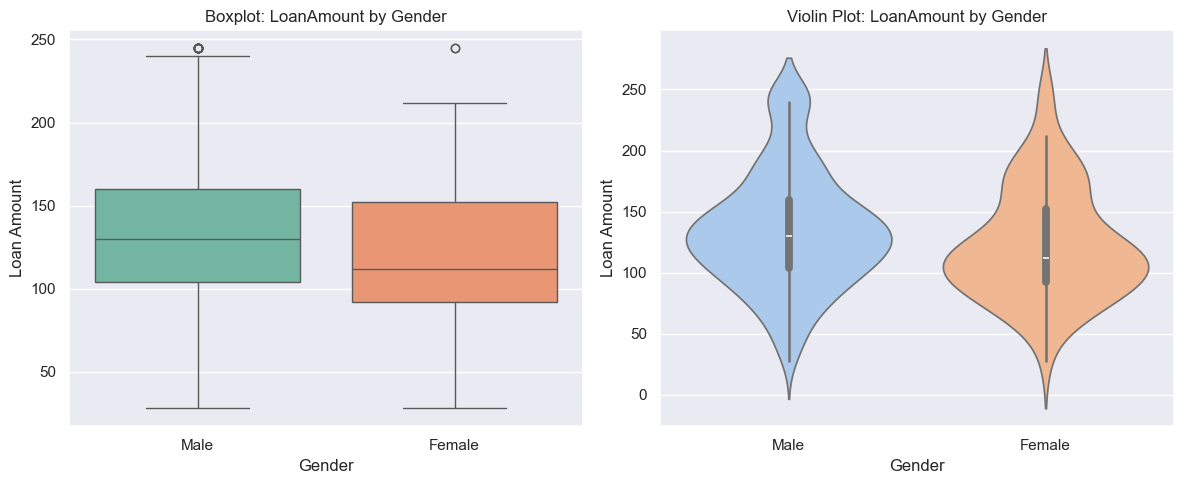

In [128]:
# LoanAmount by Gender

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Gender'], y=df['LoanAmount'], palette='Set2')
plt.title('Boxplot: LoanAmount by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Gender'], y=df['LoanAmount'], palette='pastel')
plt.title('Violin Plot: LoanAmount by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')

plt.tight_layout()
plt.show()

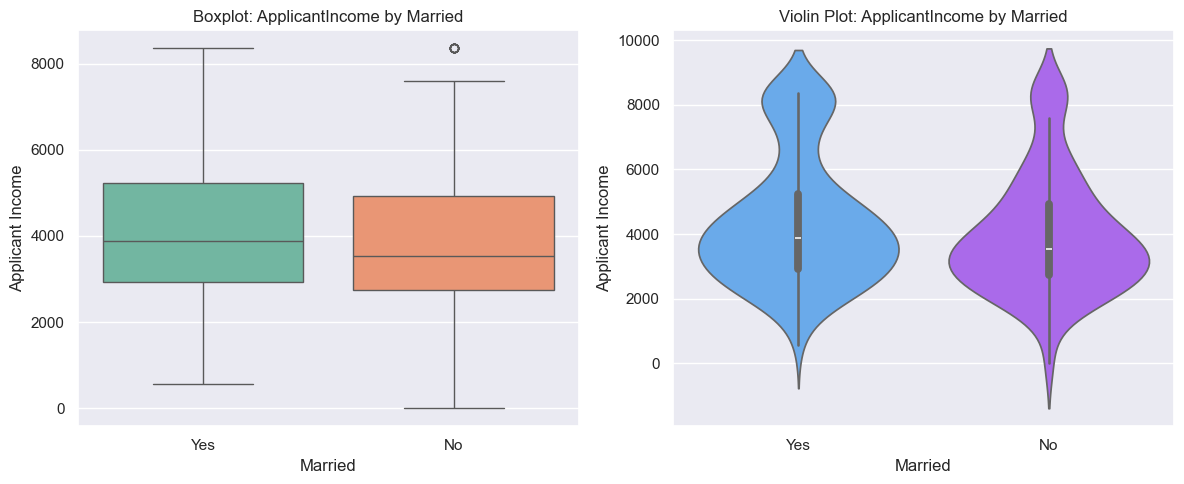

In [124]:
# ApplicantIncome by Married

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Married'], y=df['ApplicantIncome'], palette='Set2')
plt.title('Boxplot: ApplicantIncome by Married')
plt.xlabel('Married')
plt.ylabel('Applicant Income')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Married'], y=df['ApplicantIncome'], palette='cool')
plt.title('Violin Plot: ApplicantIncome by Married')
plt.xlabel('Married')
plt.ylabel('Applicant Income')

plt.tight_layout()
plt.show()

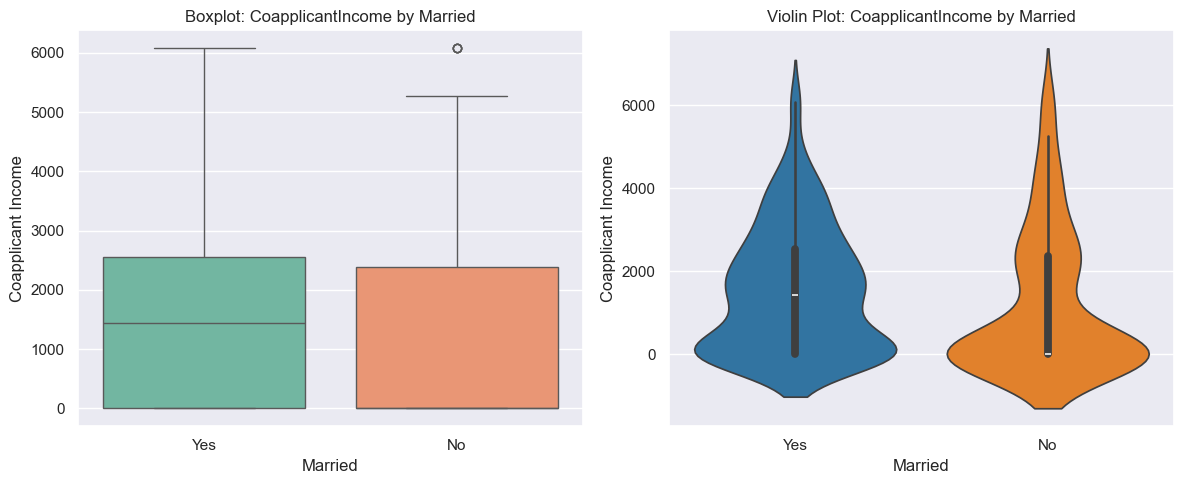

In [132]:
# CoapplicantIncome by Married

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Married'], y=df['CoapplicantIncome'], palette='Set2')
plt.title('Boxplot: CoapplicantIncome by Married')
plt.xlabel('Married')
plt.ylabel('Coapplicant Income')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Married'], y=df['CoapplicantIncome'], palette='tab10')
plt.title('Violin Plot: CoapplicantIncome by Married')
plt.xlabel('Married')
plt.ylabel('Coapplicant Income')

plt.tight_layout()
plt.show()

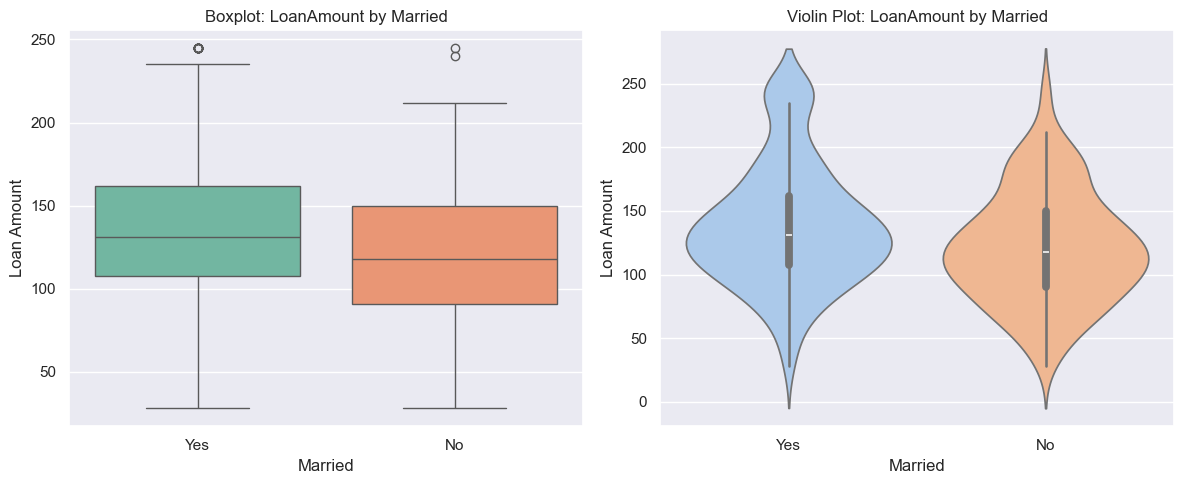

In [127]:
# LoanAmount by Married

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Married'], y=df['LoanAmount'], palette='Set2')
plt.title('Boxplot: LoanAmount by Married')
plt.xlabel('Married')
plt.ylabel('Loan Amount')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Married'], y=df['LoanAmount'], palette='pastel')
plt.title('Violin Plot: LoanAmount by Married')
plt.xlabel('Married')
plt.ylabel('Loan Amount')

plt.tight_layout()
plt.show()

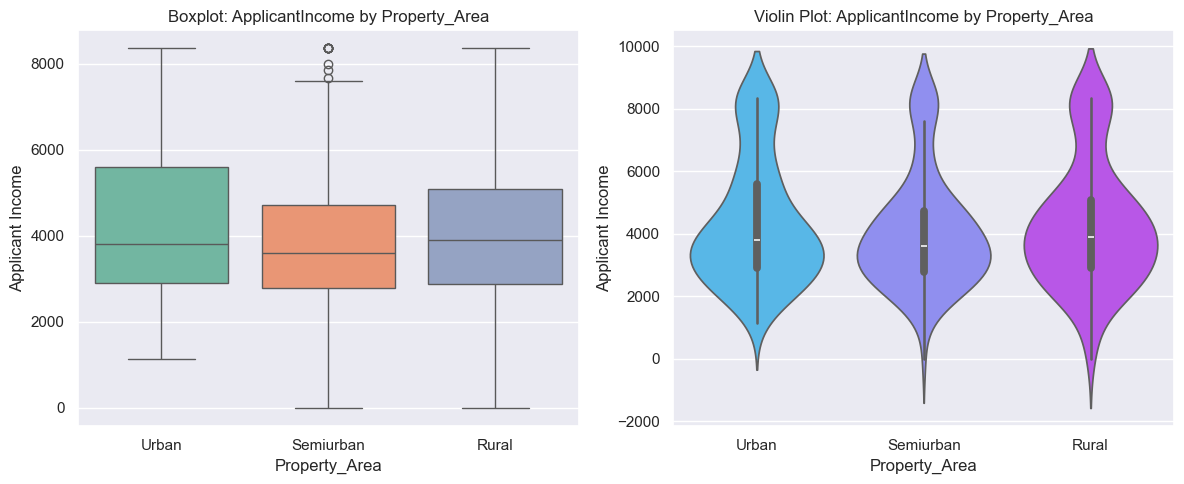

In [135]:
# ApplicantIncome by Property_Area

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Property_Area'], y=df['ApplicantIncome'], palette='Set2')
plt.title('Boxplot: ApplicantIncome by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Applicant Income')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Property_Area'], y=df['ApplicantIncome'], palette='cool')
plt.title('Violin Plot: ApplicantIncome by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Applicant Income')

plt.tight_layout()
plt.show()

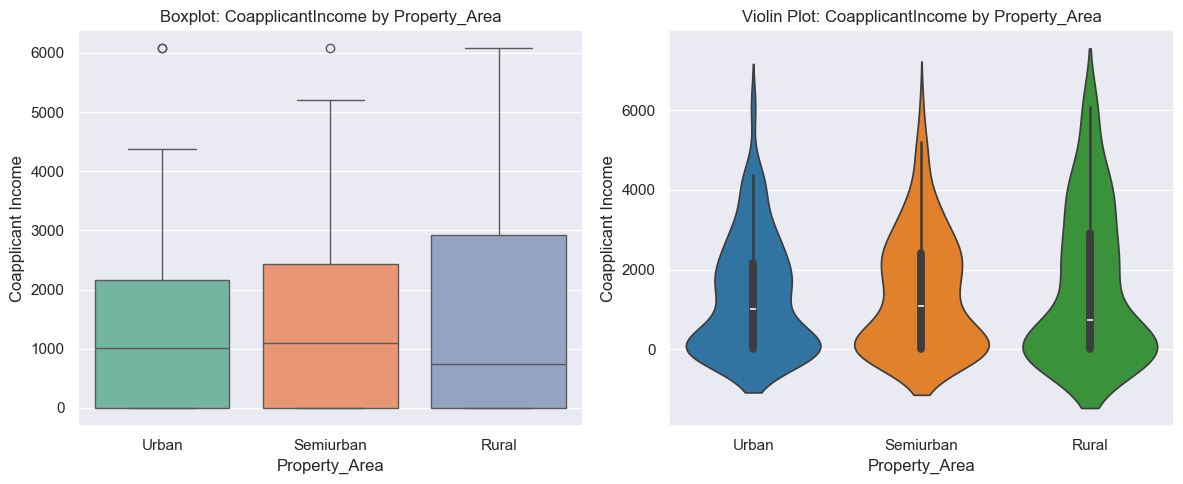

In [134]:
# CoapplicantIncome by Property_Area

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Property_Area'], y=df['CoapplicantIncome'], palette='Set2')
plt.title('Boxplot: CoapplicantIncome by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Coapplicant Income')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Property_Area'], y=df['CoapplicantIncome'], palette='tab10')
plt.title('Violin Plot: CoapplicantIncome by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Coapplicant Income')

plt.tight_layout()
plt.show()

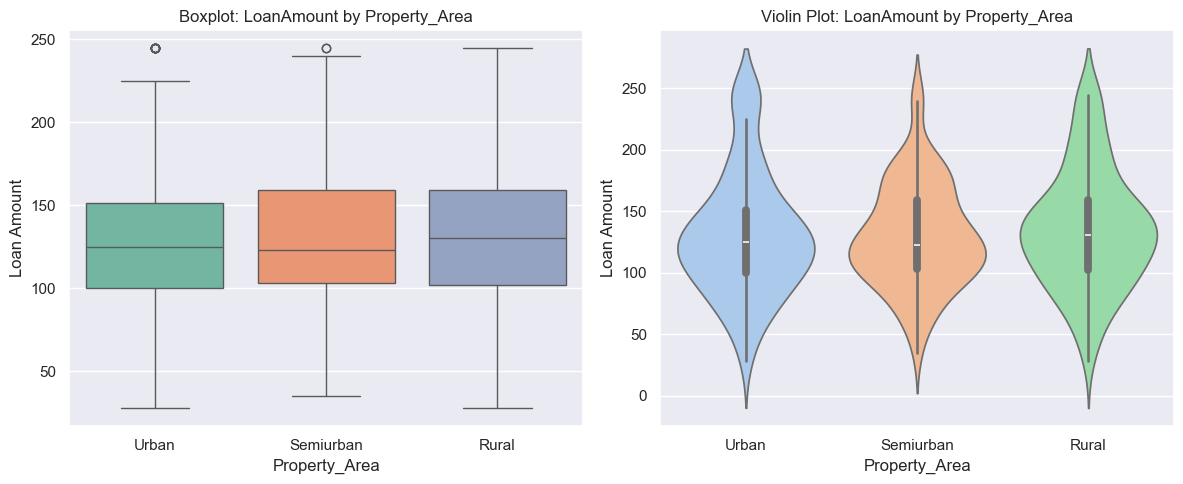

In [133]:
# LoanAmount by Property_Area

plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df['Property_Area'], y=df['LoanAmount'], palette='Set2')
plt.title('Boxplot: LoanAmount by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Loan Amount')

# Violin Plot
plt.subplot(1,2,2)
sns.violinplot(x=df['Property_Area'], y=df['LoanAmount'], palette='pastel')
plt.title('Violin Plot: LoanAmount by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Loan Amount')

plt.tight_layout()
plt.show()

## 🔥 Multivariate Analysis

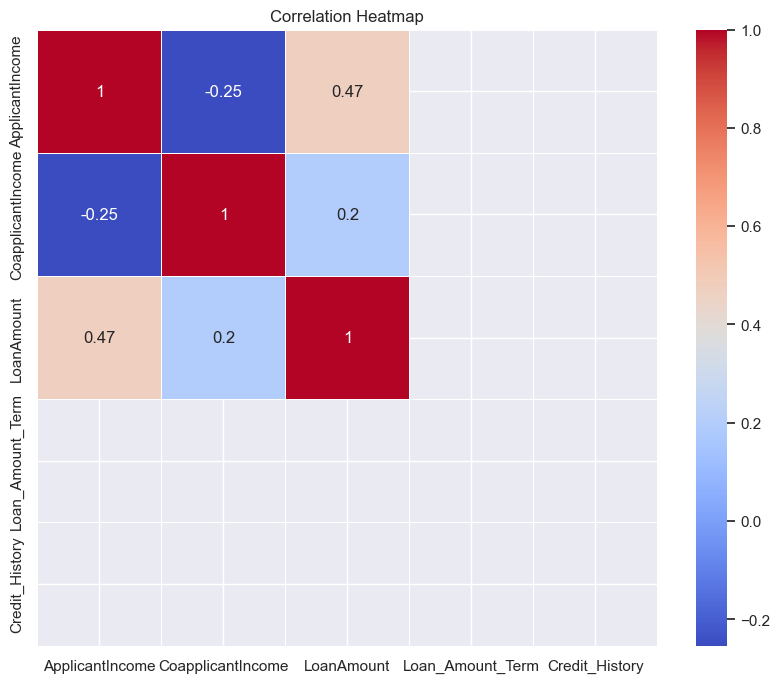

In [136]:
# Correlation Heatmap

plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 📊✨ Summary

* The data analysis revealed clear patterns in loan sanction decisions. Loan amounts showed variation across applicant incomes, with some extreme outliers. Categorical factors like Gender, Married status, and Education showed significant differences in loan approval rates, with graduates and married applicants generally more successful. The correlation heatmap highlighted moderate relationships between income-related variables and loan amounts. Overall, both numeric trends and category distributions suggest that applicant profile characteristics strongly influence loan sanction outcomes.